Importamos todas las librerias necesarias para aplicar el modelo de regrecion lineal

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importamos la data a una variable dt

In [54]:
dt=pd.read_csv("2 simple_linear_data.csv",delimiter=';')
dt.head()
dt.corr()

,x,y
x,1.000000,0.994016
y,0.994016,1.000000


Graficamos el comportamiento de la correlacion que tiene cada variable

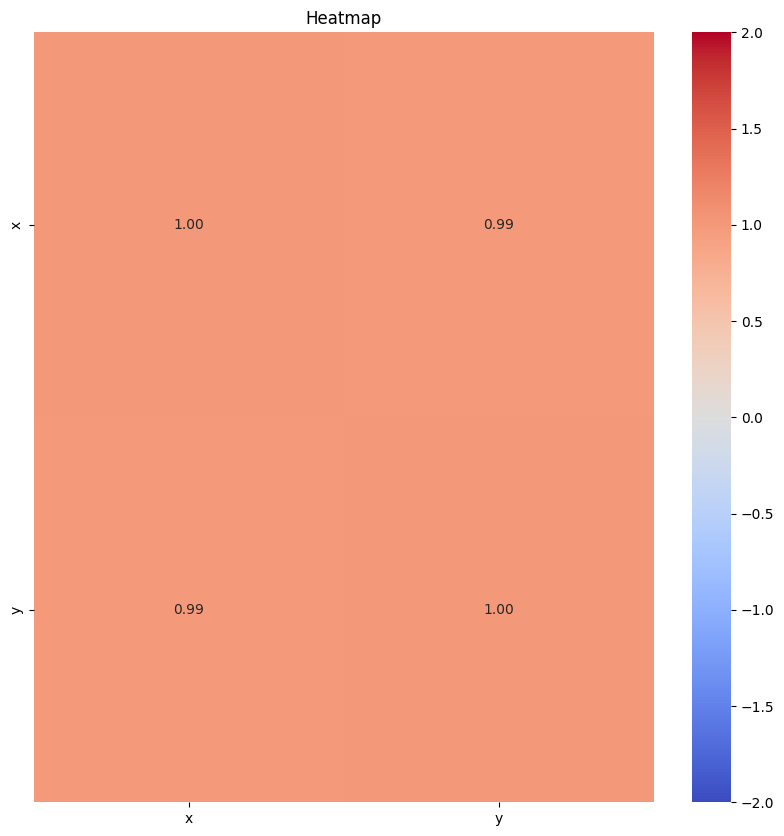

In [55]:
plt.figure(figsize=(10,10))
# matriz de correlaciones
# Creamos el heatmap, personalizando 
sns.heatmap(dt.iloc[:,0:2].corr(), cmap="coolwarm", annot=True, fmt=".2f", vmin=-2, vmax=2)
# Agregamos un título
plt.title("Heatmap")
# Mostramos el gráfico
plt.show()

Ajusta una regresión lineal simple con la característica “x” para predecir la variable objetivo “y”

In [63]:
#Asignamos los datos a las variable X y Y
X = dt[['x']]
y = dt['y']
#Aplicamos el metodo split, partiendo los datos x y y en datos de entrenamiento y datos de testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Creamos el modelo lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [57]:
#Realiamos la prediccion con los valores x de testeo para generar valores y de predicccion, esto para ver la predicion
y_pred = model.predict(X_test)
y.head()

0    4.075805
1    3.625869
2    5.581180
3    4.762034
4    4.386624
Name: y, dtype: float64

Graficamos la data de test y y la data predecida y por el modelo, vemos que la prediccion es buena 

Text(0, 0.5, 's13')

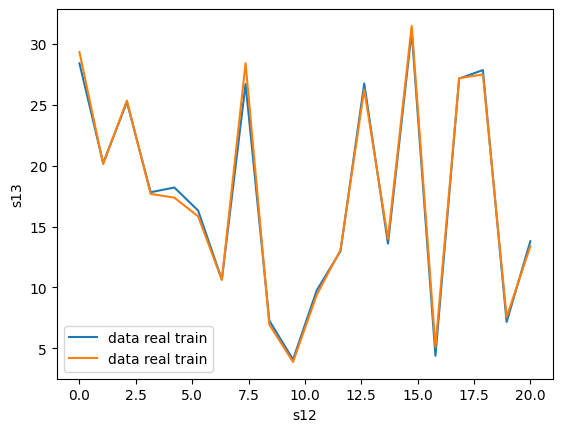

In [59]:

eje_x = np.linspace(0, len(y_test), len(y_test))
plt.plot(eje_x,y_test, label ='data real train')
plt.plot(eje_x ,y_pred, label ='data real train')
#plt.plot(X_train,model.predict(X_train), color ='red',label ='modelo lineal')
plt.legend()
plt.xlabel('s12')
plt.ylabel('s13')

Text(0, 0.5, 's13')

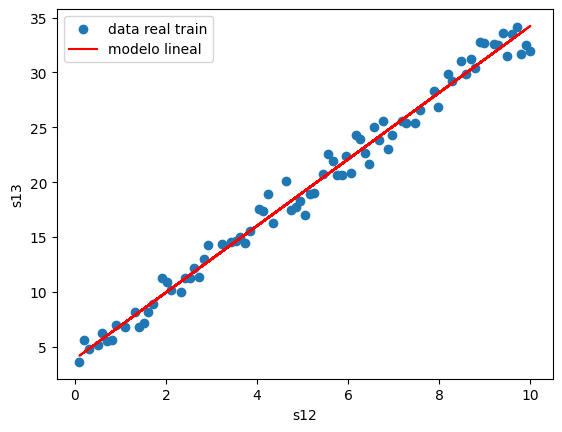

In [62]:
plt.scatter(X_train,y_train, label ='data real train')
plt.plot(X_train,model.predict(X_train), color ='red',label ='modelo lineal')
plt.legend()
plt.xlabel('s12')
plt.ylabel('s13')
 

Evalúamos el rendimiento del modelo utilizando métricas  “R^2”, “MAE”, “MSE” 

In [43]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

r2, mae, mse

(0.9954985948946393, 0.42675171541238077, 0.32877412998082106)